<a href="https://colab.research.google.com/github/PatricRc/PatricRc/blob/main/Seaborn%20-%20SocialMediaReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Executive Summary**

This report utilizes social media usage data to refine marketing strategies, highlighting crucial insights on platform popularity, user demographics, and engagement patterns. Key findings indicate significant opportunities for targeted advertising and content customization, aimed at enhancing user interaction and optimizing campaign performance.



# **Introduction**

In the digital age, social media's role in marketing is undeniable. This report aims to dissect social media usage trends to bolster customer engagement and elevate campaign success, addressing the evolving demands of online audiences.





# **Data Overview**

Our analysis is based on a comprehensive dataset detailing user interactions across various social media platforms, encompassing age, gender, time spent, and interests among other variables. Initial scrutiny reveals patterns directly aligned with strategic marketing objectives, suggesting avenues for deepened user engagement and targeted outreach.

In [2]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')


In [1]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Dictionary**

In [3]:
data = {
    'Variable': ['age', 'gender', 'time_spent', 'platform', 'interests', 'location', 'demographics', 'profession', 'income', 'indebt', 'isHomeOwner', 'Owns_Car'],
    'Description': [
        'Age of the user',
        'Gender of the user',
        'Time spent on social media (hours/week)',
        'Social media platform',
        'Interests of the user',
        'Location of the user',
        'Urban or Suburban',
        'Profession of the user',
        'Annual income of the user',
        'Whether the user is in debt (True/False)',
        'Whether the user owns a home (True/False)',
        'Whether the user owns a car (True/False)'
    ],
    'Data Type': [
        'Integer',
        'String',
        'Integer',
        'String',
        'String',
        'String',
        'String',
        'String',
        'Integer',
        'Boolean',
        'Boolean',
        'Boolean'
    ]
}


In [4]:
# Create the DataFrame from the data dictionary
data_dict_df = pd.DataFrame(data)

# Display the DataFrame
data_dict_df.head(12)


,Variable,Description,Data Type
0,age,Age of the user,Integer
1,gender,Gender of the user,String
2,time_spent,Time spent on social media (hours/week),Integer
3,platform,Social media platform,String
4,interests,Interests of the user,String
5,location,Location of the user,String
6,demographics,Urban or Suburban,String
7,profession,Profession of the user,String
8,income,Annual income of the user,Integer
9,indebt,Whether the user is in debt (True/False),Boolean


In [ ]:
# Read and show the dataset
df = pd.read_csv("SocialMedia_Time_Spend.csv")

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False


# **Data Preparation and Cleaning**

handling missing values, data type corrections, outlier identification.

In [ ]:
# Describe the dataset


,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [ ]:
df.dtypes

age              int64
gender          object
time_spent       int64
platform        object
interests       object
location        object
demographics    object
profession      object
income           int64
indebt            bool
isHomeOwner       bool
Owns_Car          bool
dtype: object

In [ ]:
# prompt: sum of blank in pandas
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [ ]:
# prompt: drop na from a dataset

df.dropna(inplace=True)


In [ ]:
data = df.copy()
data['indebt'] = data['indebt'].apply(lambda x: 'Yes' if x else 'No')
data.head(3)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,Yes,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,Yes,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,No,False,False


In [ ]:
data['time_spent_category'] = np.select(
    [data['time_spent'] < data['time_spent'].mean(), data['time_spent'] == data['time_spent'].mean(), data['time_spent'] > data['time_spent'].mean()],
    ['Low time spent', 'Medium time spent', 'High time spent']
)
data.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,time_spent_category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,Yes,False,False,Low time spent
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,Yes,True,True,Low time spent
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,No,False,False,High time spent
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,No,True,False,Low time spent
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,No,True,True,Low time spent


# **Data Analysis and Visualization**

In this section, we'll explore key insights from our social media data through visualization, uncovering trends to inform and enhance our marketing strategies. Let's dive into the visuals and discover actionable intelligence.

# ***Time Spent on Social Media by Platform***

In [ ]:
# Calculate the average time spent on each platform
platform_time_avg = df.groupby('platform')['time_spent'].mean().reset_index().sort_values(by='time_spent', ascending=False)
platform_time_avg


,platform,time_spent
1,Instagram,5.151515
0,Facebook,5.055375
2,YouTube,4.869697


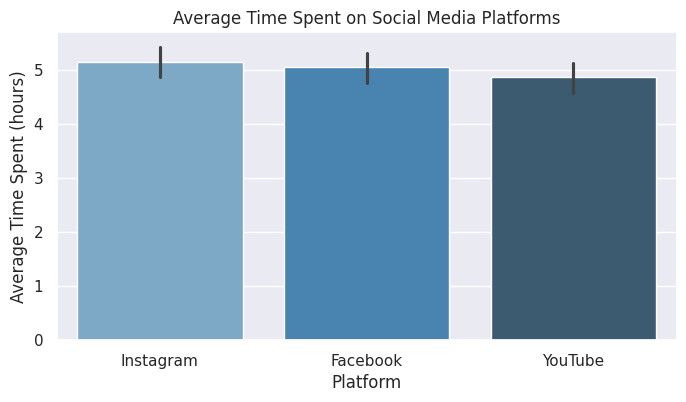

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_theme(style="darkgrid", palette="Blues_d")

# Use plt.figure to adjust the figure size if needed
plt.figure(figsize=(8, 4))

# Create the bar plot without the 'ci' parameter, which is deprecated
sns.barplot(x='platform', y='time_spent', data=df, palette="Blues_d")

# Set the title and labels of the plot
plt.title('Average Time Spent on Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Time Spent (hours)')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Display the plot
plt.show()

# ***Gender Distribution Across Platforms with Data Labels***

In [ ]:
# Gender Distribution Across Platforms - Table
gender_platform_group = df.groupby(['platform', 'gender']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
gender_platform_group

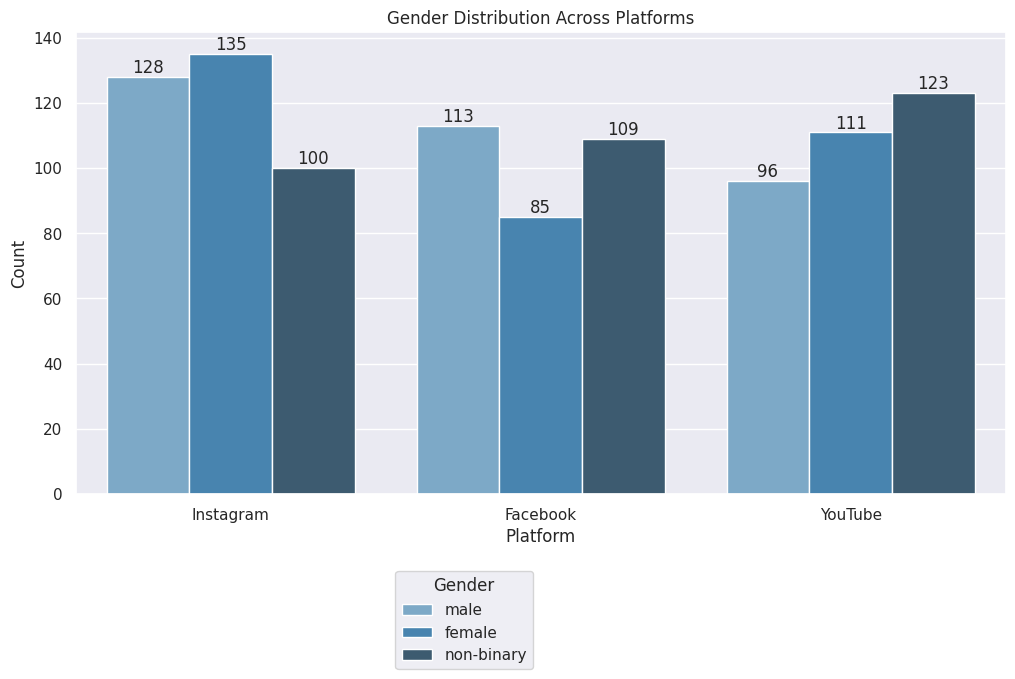

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='platform', hue='gender', data=df, palette="Blues_d")

# Add labels above the bars
for container in ax.containers:
    ax.bar_label(container)

plt.title('Gender Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.show()

# ***Age Distribution of Social Media Users***

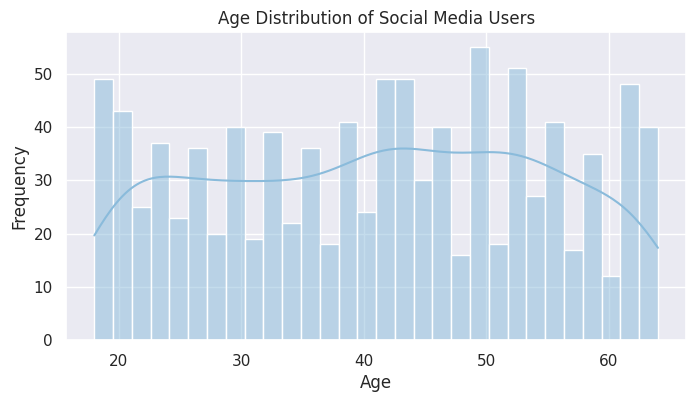

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='age', bins=30, palette="Blues_d", kde=True)
plt.title('Age Distribution of Social Media Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# ***Time Spent on Social Media by Age Group***

In [ ]:
# Assuming 'age_group' is a categorical column you've created that bins age values
age_group_time_group = data.groupby('age')['time_spent'].mean().reset_index().sort_values(by='time_spent', ascending=False)
age_group_time_group.head(10)

,age,time_spent
30,48,6.187500
1,19,5.916667
20,38,5.789474
21,39,5.772727
2,20,5.750000
35,53,5.739130
31,49,5.680000
23,41,5.640000
26,44,5.625000
10,28,5.600000


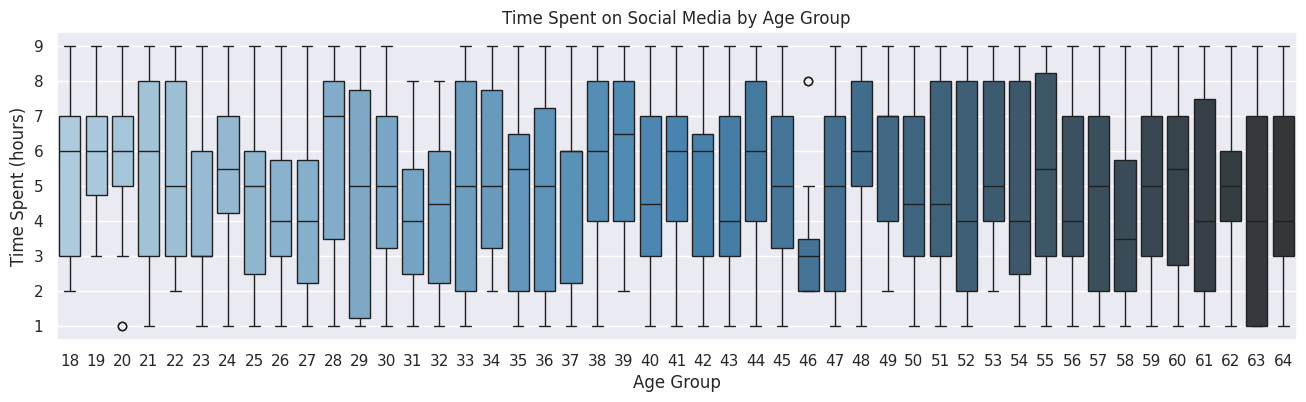

In [ ]:
plt.figure(figsize=(16, 4))
sns.boxplot(x='age', y='time_spent', data=df, palette="Blues_d")  # Ensure your df has an 'age_group' column
plt.title('Time Spent on Social Media by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time Spent (hours)')
plt.show()

# ***Interests vs. Time Spent on Platforms***

In [ ]:
# Interests vs. Time Spent on Platforms
interests_time_platform_group = data.groupby(['interests', 'platform'])['time_spent'].mean().reset_index().sort_values(by='time_spent', ascending=False)
interests_time_platform_group

,interests,platform,time_spent
7,Travel,Instagram,5.379630
0,Lifestlye,Facebook,5.206522
2,Lifestlye,YouTube,5.201681
4,Sports,Instagram,5.064000
1,Lifestlye,Instagram,5.046154
3,Sports,Facebook,5.016807
6,Travel,Facebook,4.958333
8,Travel,YouTube,4.951613
5,Sports,YouTube,4.298851


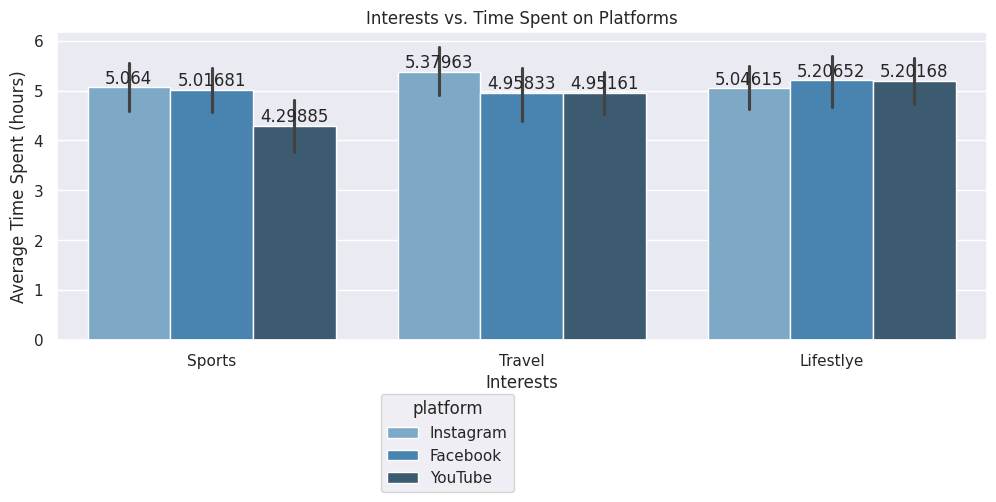

In [ ]:
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='interests', y='time_spent', hue='platform', data=df, palette="Blues_d")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Interests vs. Time Spent on Platforms')
plt.xlabel('Interests')
plt.ylabel('Average Time Spent (hours)')
plt.legend(title='platform', loc='upper right', bbox_to_anchor=(0.5, -0.15), ncol=1)
plt.show()

# ***Relationship Between Profession and Social Media Platform Preference***

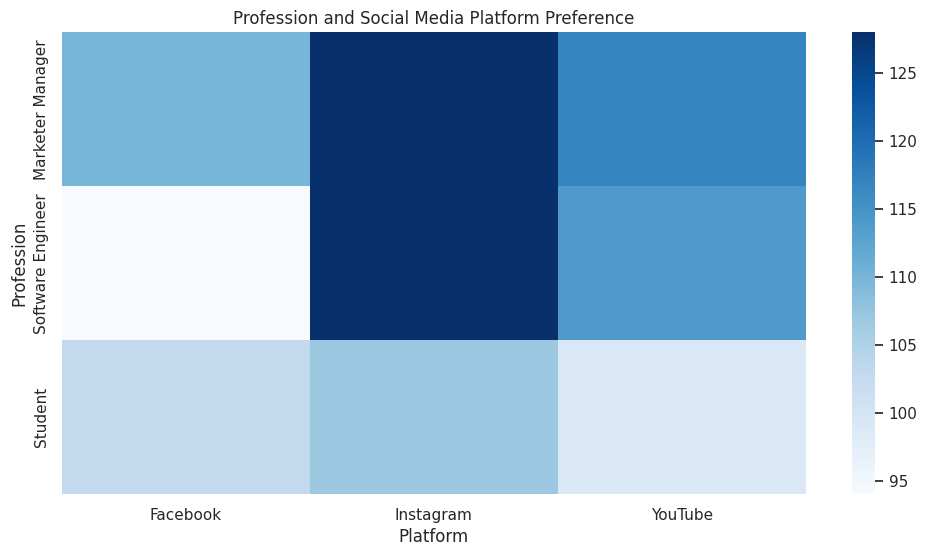

In [ ]:
# For the heatmap, first create a crosstab or pivot table.
profession_platform_ct = pd.crosstab(data['profession'], data['platform'])
plt.figure(figsize=(12, 6))
sns.heatmap(profession_platform_ct, cmap="Blues")
plt.title('Profession and Social Media Platform Preference')
plt.xlabel('Platform')
plt.ylabel('Profession')
plt.show()

# **Social Media Engagement Based on Location**

In [ ]:
location_time_group = data.groupby('location')['time_spent'].sum().reset_index().sort_values(by='time_spent', ascending=False)
location_time_group

,location,time_spent
0,Australia,1837
1,United Kingdom,1615
2,United States,1577


<Figure size 800x400 with 0 Axes>

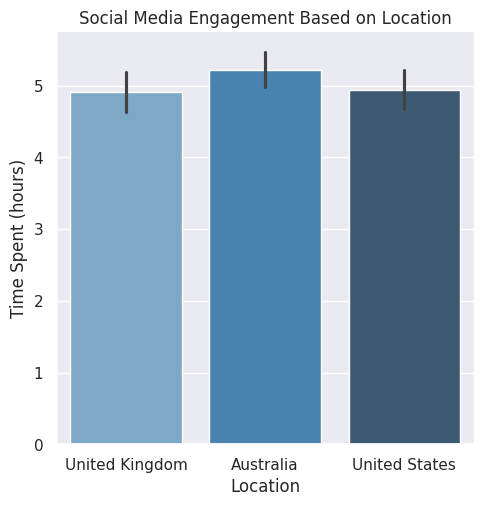

In [ ]:
plt.figure(figsize=(8, 4))
sns.catplot(x='location', y='time_spent', kind="bar", data=df, palette="Blues_d")
plt.title('Social Media Engagement Based on Location')
plt.xlabel('Location')
plt.ylabel('Time Spent (hours)')
plt.show()

# ***Influence of Income on Time Spent on Social Media***

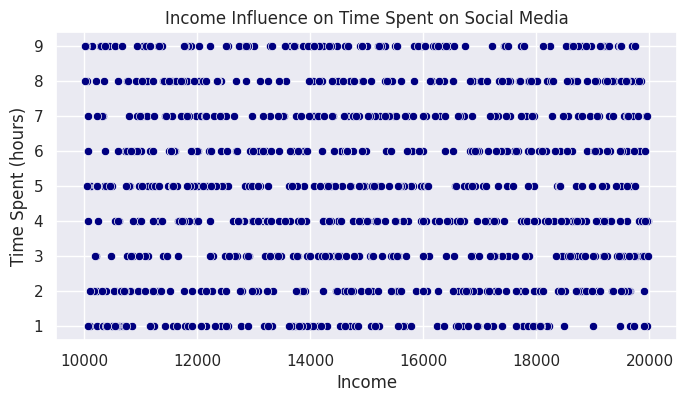

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='income', y='time_spent', data=df, color="navy")
plt.title('Income Influence on Time Spent on Social Media')
plt.xlabel('Income')
plt.ylabel('Time Spent (hours)')
plt.show()

# ***In Debt and Social Media Activity***

In [ ]:
data.head(3)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car,time_spent_category
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,Yes,False,False,Low time spent
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,Yes,True,True,Low time spent
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,No,False,False,High time spent


In [ ]:
indebt_group = data.groupby('indebt')['time_spent'].sum().reset_index()
indebt_group

,indebt,time_spent
0,No,2513
1,Yes,2516


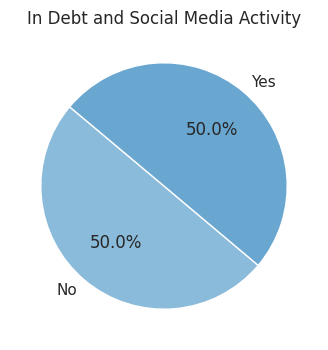

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(indebt_group['time_spent'], labels=indebt_group['indebt'],
        colors=sns.color_palette("Blues_d"), autopct='%1.1f%%', startangle=140)
plt.title('In Debt and Social Media Activity')
plt.show()

# ***Home Ownership and Social Media Activity***

In [ ]:
homeowner_time_group = df.groupby('isHomeOwner')['time_spent'].mean().reset_index()
homeowner_time_group

,isHomeOwner,time_spent
0,False,4.953252
1,True,5.102362


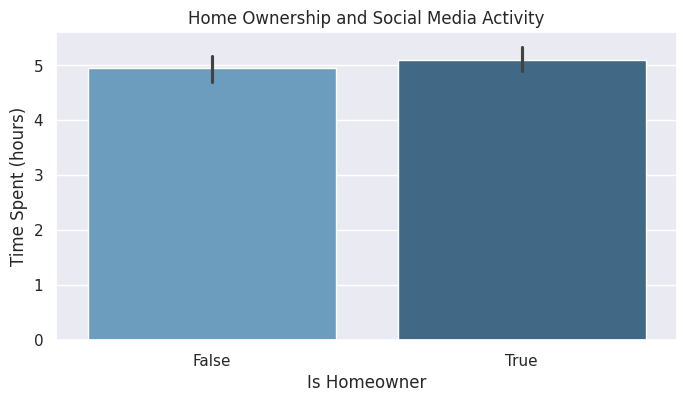

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='isHomeOwner', y='time_spent', data=df, palette="Blues_d")
plt.title('Home Ownership and Social Media Activity')
plt.xlabel('Is Homeowner')
plt.ylabel('Time Spent (hours)')
plt.show()

# **Insights and Patterns**



*   **Gender Distribution:** The gender distribution across social media platforms is relatively even with a slight male predominance on social media.
*  **Platform Popularity:** Instagram is the most popular platform, followed closely by YouTube and Facebook.
* **Interests and Platform:** 'Lifestyle' is the top interest among the users, which could indicate content preference trends.
* **Profession:** 'Marketer Manager' is the most common profession among the users, potentially influencing the content and ads they interact with.
* **Age and Engagement:** There is a negligible negative correlation between age and time spent on social media, suggesting that younger users are slightly more active.



# **Strategic Recommendations**

* **Targeted Advertising**: Focus on lifestyle-related content on Instagram, as it’s the most popular interest and platform combination.

* **Content Customization:** Tailor content to appeal to a balanced gender distribution, emphasizing areas of common interest like sports and travel.

* **Optimal Posting Times:** Further analysis would be required to determine the best times to post, but considering the global user base, round-the-clock engagement strategies might be beneficial.